In [ ]:
#IMPORT ALL NECESSARY ONES ;)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#GET LOADED
data = pd.read_csv('/content/Advertising Budget and Sales.csv')

In [ ]:
#A QUICK PEEK INTO DATA
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
#WANT TO KNOW MORE ABOUT
print(data.info())
print(data.isnull().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64
       Unnamed: 0  TV Ad Budget ($)  ...  Newspaper Ad Budget ($)   Sales ($)
count  200.000000        200.000000  ...               200.000000  200.000000
mean   100.500000        147.042500  ...                30.554000   14.022500
std     57.879185         85.854236  ...                21.778621    5.

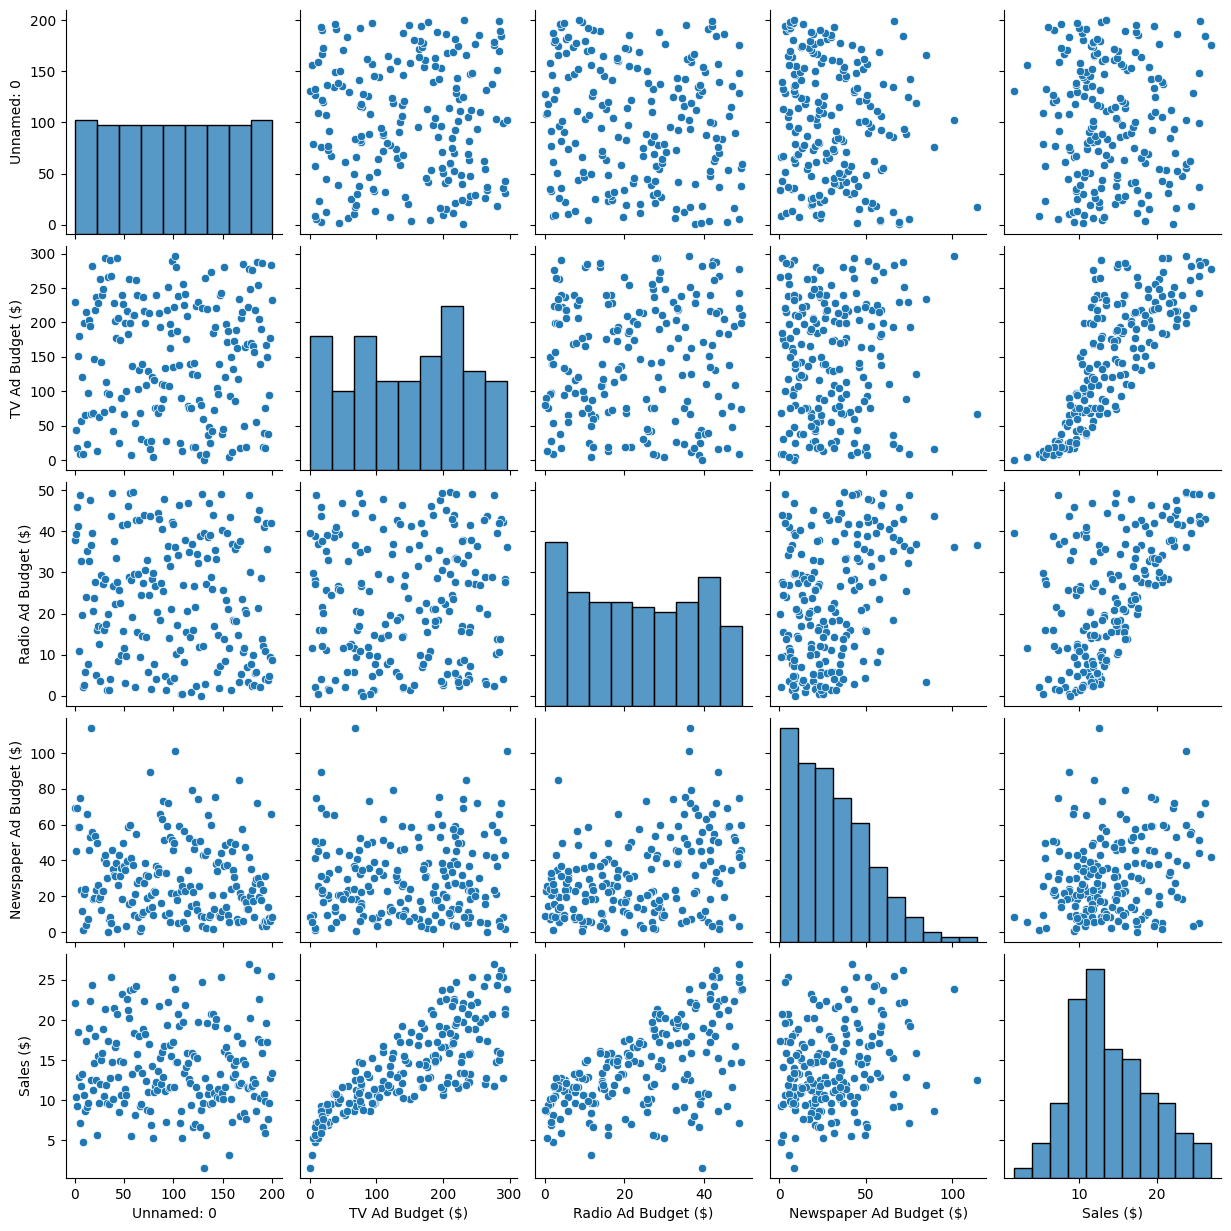

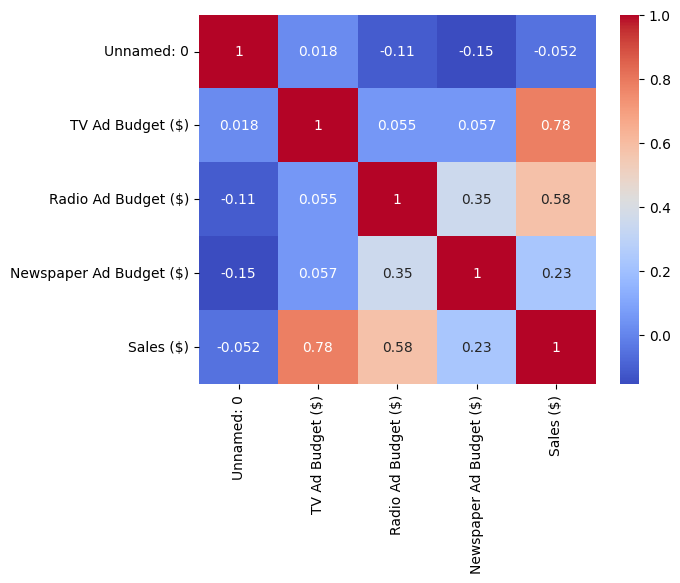

In [ ]:
# WATCH RELATIONSHIPS
sns.pairplot(data)
plt.show()

# CORRELATION HEATMAP: NOT THAT HEATED
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#DIVIDE DATA AND RULE
X = data[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = data['Sales ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#MODEL BEING LOADED
dt_model = DecisionTreeRegressor(random_state=42, max_depth=4)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:
#IT'S TIME TO TEST
y_pred = dt_model.predict(X_test)

In [ ]:
#REPORT: LIKE WE HAVE RESULTS
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree MSE: {mse:.2f}")
print(f"Decision Tree R2 Score: {r2:.2f}")


Decision Tree MSE: 3.33
Decision Tree R2 Score: 0.89


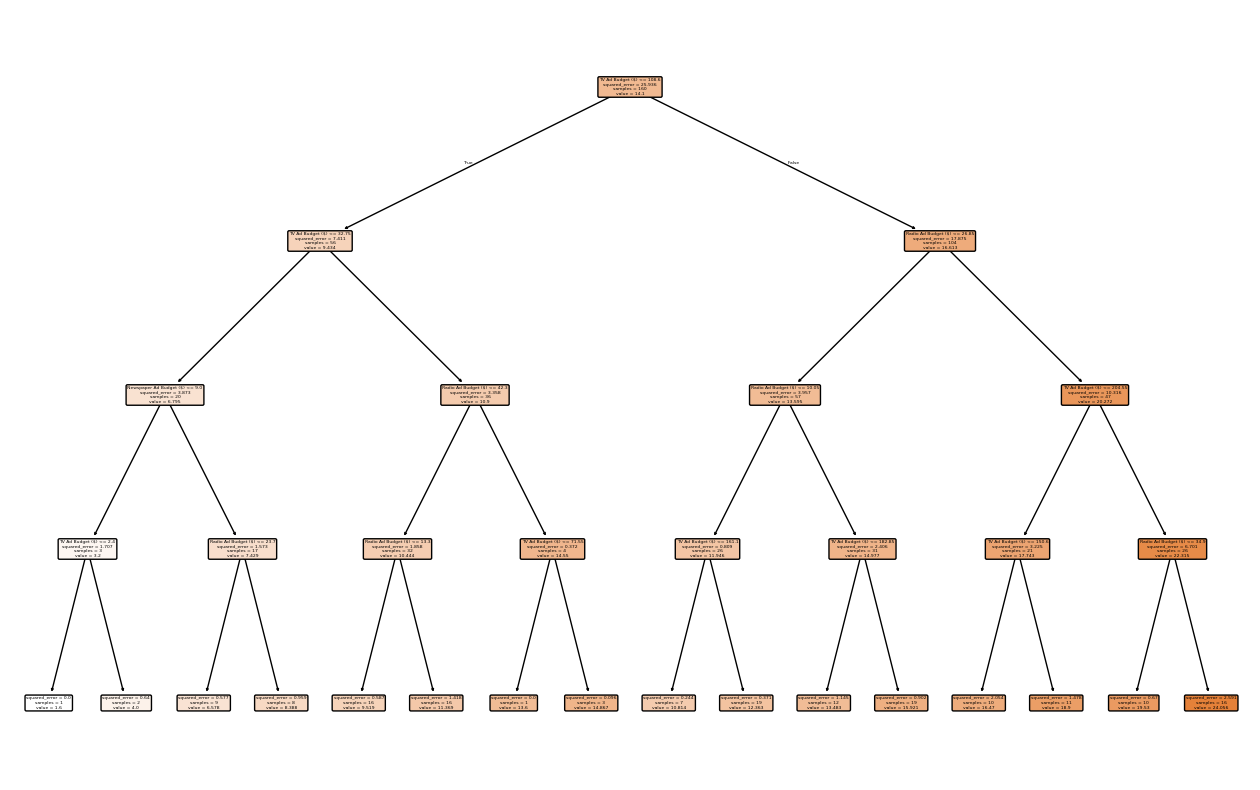

In [ ]:
#SOMETHING THAT JUSTIFIES MODEL NAME
from sklearn import tree

plt.figure(figsize=(16,10))
tree.plot_tree(
    dt_model,
    feature_names=['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)'],
    filled=True,
    rounded=True
)
plt.show()


In [ ]:
#WHY TO RESTRICT: I'LL CUSTOMIZE MY INPUTS
tv = float(input("Enter TV ad budget ($): "))
radio = float(input("Enter Radio ad budget ($): "))
newspaper = float(input("Enter Newspaper ad budget ($): "))


user_input = [[tv, radio, newspaper]]
predicted_sales = dt_model.predict(user_input)

print(f"Predicted Sales: {predicted_sales[0]:.2f} units")


Enter TV ad budget ($): 54
Enter Radio ad budget ($): 89
Enter Newspaper ad budget ($): 45
Predicted Sales: 13.60 units


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
